**Facebook Finanacial Analytics from 18-Jan-2020 to 18-Jan-2021**

In [48]:
import pandas as pd 
import numpy as np

In [49]:
df = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/FB?period1=1579353989&period2=1610976389&interval=1d&events=history&includeAdjustedClose=true')

In [50]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-21,222.160004,222.369995,219.119995,221.440002,221.440002,14275800
1,2020-01-22,222.309998,222.750000,221.279999,221.320007,221.320007,12212800
2,2020-01-23,220.750000,221.490005,219.270004,219.759995,219.759995,11195000
3,2020-01-24,220.800003,221.779999,216.110001,217.940002,217.940002,11905800
4,2020-01-27,213.100006,216.059998,212.500000,214.869995,214.869995,13810700
...,...,...,...,...,...,...,...
246,2021-01-11,260.480011,263.470001,255.899994,256.839996,256.839996,30412300
247,2021-01-12,256.630005,259.720001,250.300003,251.089996,251.089996,26449900
248,2021-01-13,251.550003,253.949997,249.199997,251.639999,251.639999,19528900
249,2021-01-14,253.399994,255.029999,244.610001,245.639999,245.639999,29739400


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [52]:
df['Date'] = pd.to_datetime(df['Date'])

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       251 non-null    datetime64[ns]
 1   Open       251 non-null    float64       
 2   High       251 non-null    float64       
 3   Low        251 non-null    float64       
 4   Close      251 non-null    float64       
 5   Adj Close  251 non-null    float64       
 6   Volume     251 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.9 KB


In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([737485., 737546., 737607., 737669., 737730., 737791.]),
 <a list of 6 Text major ticklabel objects>)

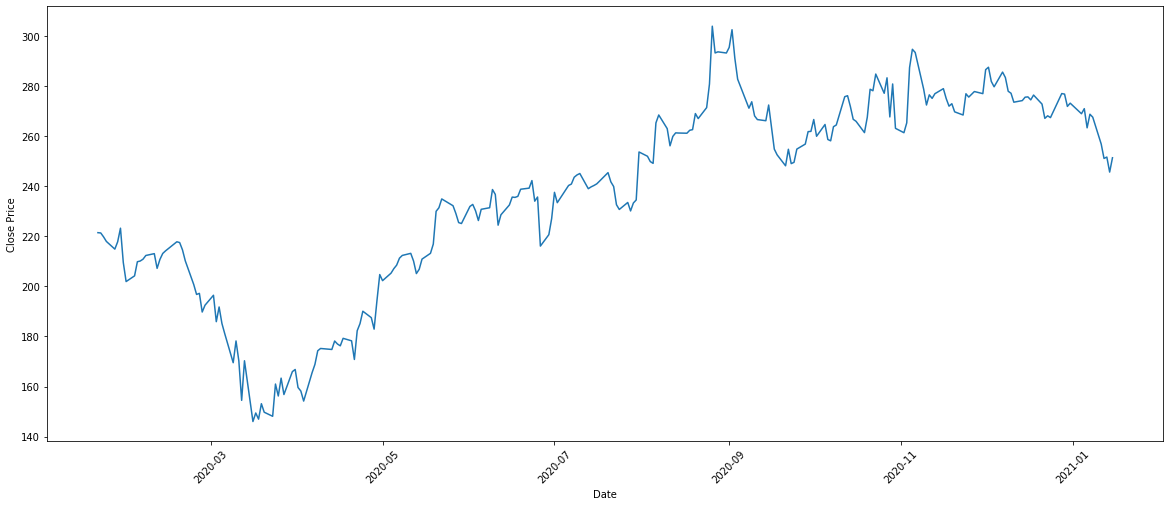

In [55]:
plt.figure(figsize=(20,8))
plt.plot('Date','Close',data=df)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)

In [56]:
df['Daily Lag'] = df['Close'].shift(1)   #Creation of columns
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Lag
0,2020-01-21,222.160004,222.369995,219.119995,221.440002,221.440002,14275800,NaN
1,2020-01-22,222.309998,222.750000,221.279999,221.320007,221.320007,12212800,221.440002
2,2020-01-23,220.750000,221.490005,219.270004,219.759995,219.759995,11195000,221.320007
3,2020-01-24,220.800003,221.779999,216.110001,217.940002,217.940002,11905800,219.759995
4,2020-01-27,213.100006,216.059998,212.500000,214.869995,214.869995,13810700,217.940002


In [57]:
df['Daily Returns'] = (df['Daily Lag']/df['Close']) -1   # Daily returns tells us the returns that we obtain in a day after the stock price closes
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Lag,Daily Returns
0,2020-01-21,222.160004,222.369995,219.119995,221.440002,221.440002,14275800,NaN,NaN
1,2020-01-22,222.309998,222.750000,221.279999,221.320007,221.320007,12212800,221.440002,0.000542
2,2020-01-23,220.750000,221.490005,219.270004,219.759995,219.759995,11195000,221.320007,0.007099
3,2020-01-24,220.800003,221.779999,216.110001,217.940002,217.940002,11905800,219.759995,0.008351
4,2020-01-27,213.100006,216.059998,212.500000,214.869995,214.869995,13810700,217.940002,0.014288


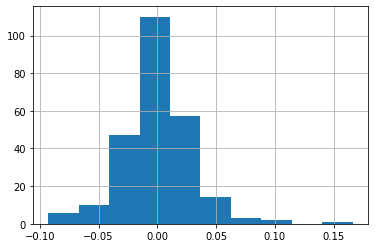

In [58]:
df['Daily Returns'].hist()

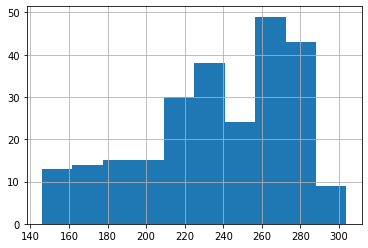

In [59]:
df['Daily Lag'].hist()

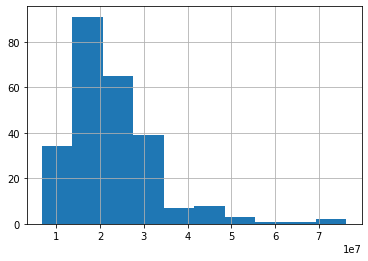

In [60]:
df['Volume'].hist()

In [61]:
mean = df['Daily Returns'].mean()
std = df['Daily Returns'].std()
print('mean =',mean)
print('Std deviation =',std)

mean = -7.394855788405197e-05
Std deviation = 0.02962655822021488


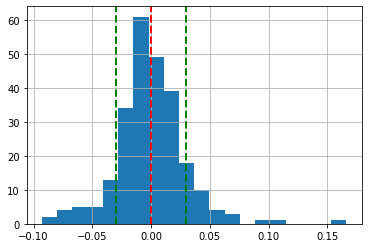

In [62]:
df['Daily Returns'].hist(bins=20)
plt.axvline(mean,color='red',linestyle='dashed',linewidth=2)
#to plot the std line we plot both the positive and negative values 
plt.axvline(std,color='g',linestyle='dashed',linewidth=2)
plt.axvline(-std,color='g',linestyle='dashed',linewidth=2)

In [63]:
df['Daily Returns'].kurtosis()

4.665811691285164